# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | almus
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | sola
Processing Record 5 of Set 1 | asau village
City not found. Skipping...
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | puerto quijarro
Processing Record 10 of Set 1 | tengrela
Processing Record 11 of Set 1 | remire-montjoly
Processing Record 12 of Set 1 | dhidhdhoo
Processing Record 13 of Set 1 | afaahiti
Processing Record 14 of Set 1 | kerikeri
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | piti village
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | zaozersk
Processing Record 19 of Set 1 | tynda
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | gryt

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alofi,-19.0595,-169.9187,298.09,94,68,0.51,NU,1737737318
1,almus,40.3758,36.9044,277.07,74,38,3.39,TR,1737737320
2,lebu,-37.6167,-73.6500,290.60,68,29,7.44,CL,1737737321
3,sola,-13.8833,167.5500,301.05,71,100,1.91,VU,1737737322
4,puerto natales,-51.7236,-72.4875,290.40,48,75,11.32,CL,1737737324


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alofi,-19.0595,-169.9187,298.09,94,68,0.51,NU,1737737318
1,almus,40.3758,36.9044,277.07,74,38,3.39,TR,1737737320
2,lebu,-37.6167,-73.6500,290.60,68,29,7.44,CL,1737737321
3,sola,-13.8833,167.5500,301.05,71,100,1.91,VU,1737737322
4,puerto natales,-51.7236,-72.4875,290.40,48,75,11.32,CL,1737737324


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

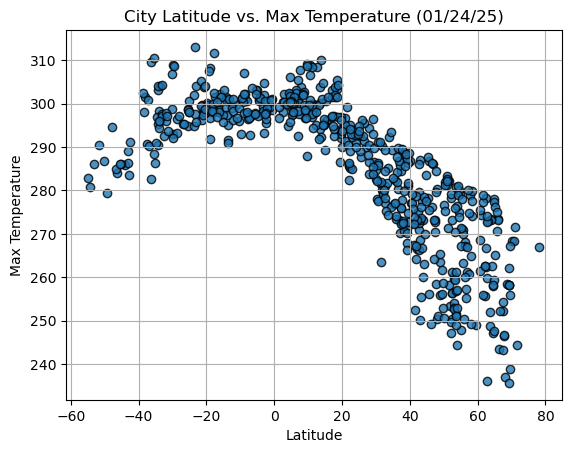

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

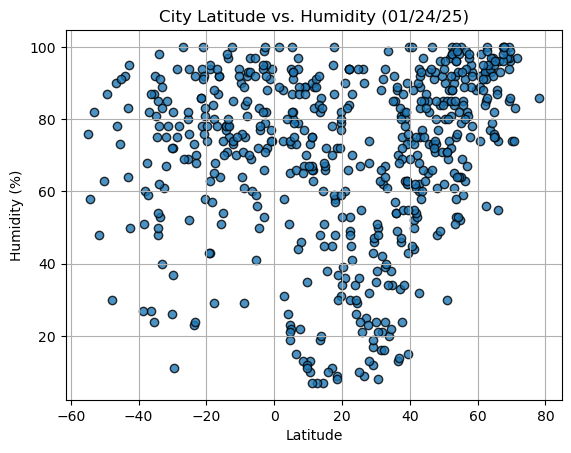

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

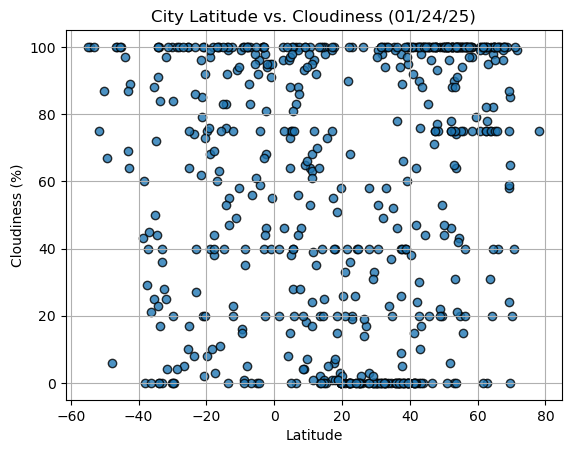

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

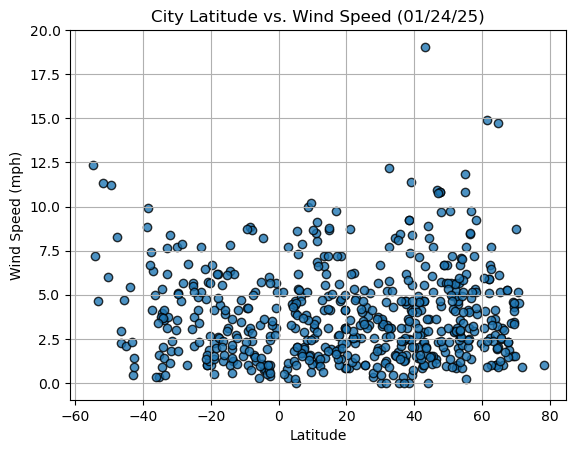

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Define text coordinates
    text_coordinates = (x_values.min() + 5, y_values.min() + 5)

    # Plot scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()
    
    # Print the r value
    print(f"The r^2 value is: {rvalue}")
    



In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,almus,40.3758,36.9044,277.07,74,38,3.39,TR,1737737320
8,tengrela,10.4869,-6.4097,309.03,10,64,3.13,CI,1737737329
9,remire-montjoly,4.9167,-52.2667,299.17,94,75,4.63,GF,1737737330
10,dhidhdhoo,6.8833,73.1000,300.52,79,88,7.89,MV,1737737331
14,piti village,13.4626,144.6933,300.18,82,20,4.12,GU,1737737336


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alofi,-19.0595,-169.9187,298.09,94,68,0.51,NU,1737737318
2,lebu,-37.6167,-73.6500,290.60,68,29,7.44,CL,1737737321
3,sola,-13.8833,167.5500,301.05,71,100,1.91,VU,1737737322
4,puerto natales,-51.7236,-72.4875,290.40,48,75,11.32,CL,1737737324
5,adamstown,-25.0660,-130.1015,298.13,76,17,3.73,PN,1737737326


###  Temperature vs. Latitude Linear Regression Plot

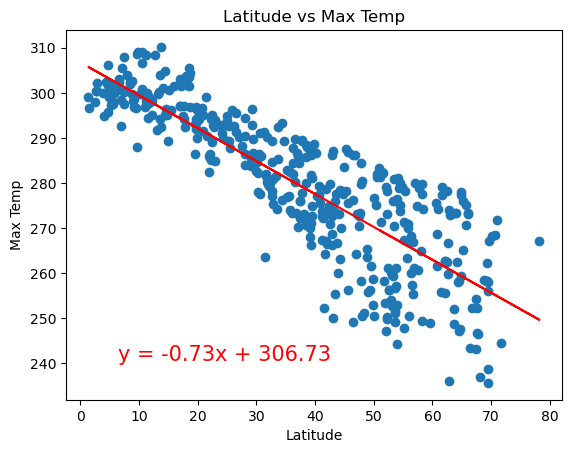

The r^2 value is: -0.8483096269914042


In [62]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude vs Max Temp", "Latitude", "Max Temp")



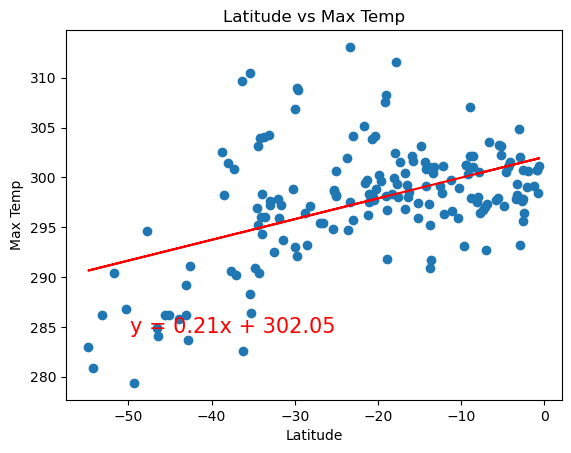

The r^2 value is: 0.4896607835843254


In [63]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude vs Max Temp", "Latitude", "Max Temp")

**Discussion about the linear relationship:** 
These two graphs show that the link between how far you are from the equator (latitude) and the hottest temperature (max temp) can be different in different places.

One place showed higher temps further from the equator, which is unexpected. This might be because of things like ocean currents or the landscape. The other place showed the opposite, with lower temps further away, which is more expected.

### Humidity vs. Latitude Linear Regression Plot

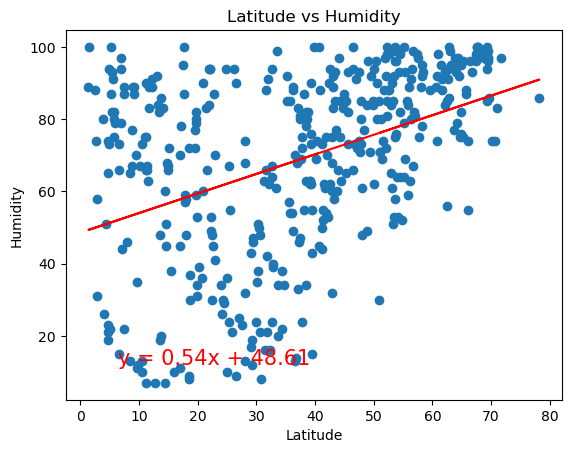

The r^2 value is: 0.41285177274198465


In [68]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude vs Humidity", "Latitude", "Humidity")


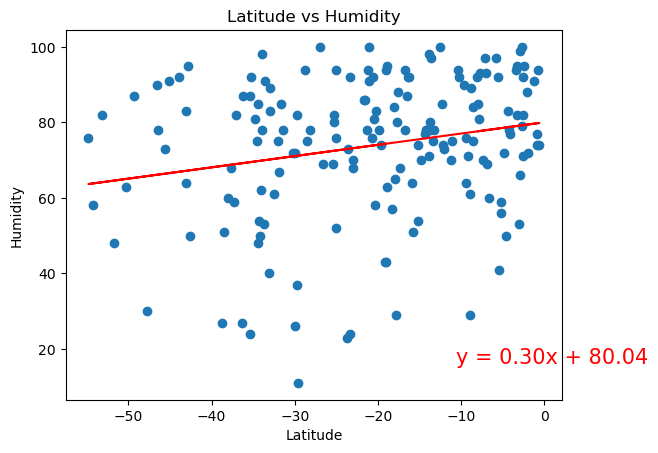

The r^2 value is: 0.2178992763857068


In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude vs Humidity", "Latitude", "Humidity")

**Discussion about the linear relationship:** The graph shows that there's a link between latitude and humidity - higher latitude generally means higher humidity.

### Cloudiness vs. Latitude Linear Regression Plot

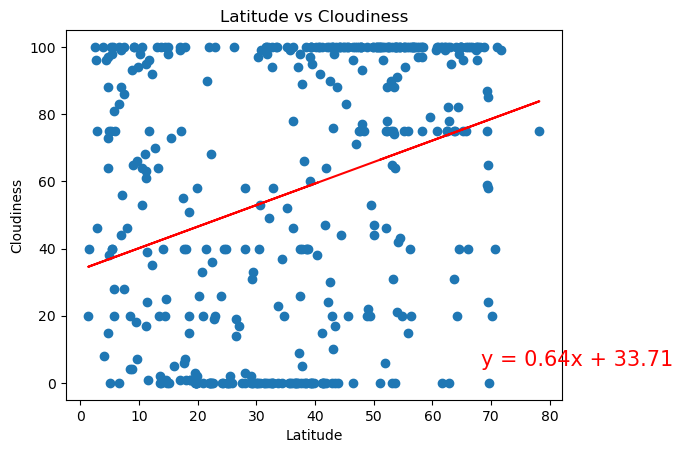

The r^2 value is: 0.30735843816061087


In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude vs Cloudiness", "Latitude", "Cloudiness")

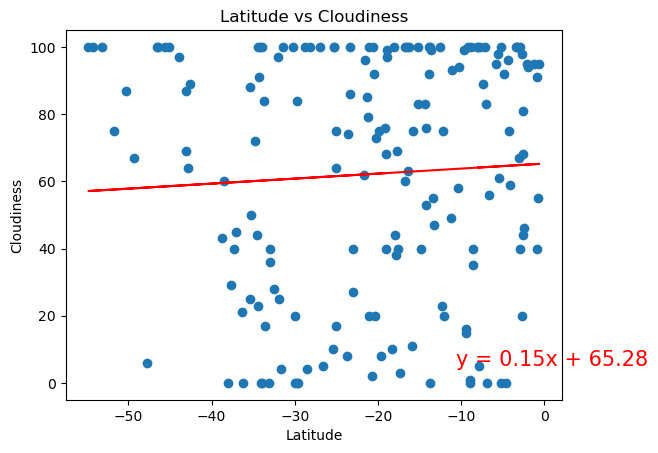

The r^2 value is: 0.057052606777556476


In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude vs Cloudiness", "Latitude", "Cloudiness")

**Discussion about the linear relationship:** 
 The Southern Hemisphere had higher temperatures further from the equator, which is unexpected. This might be due to the vast amount of ocean in that half of the world. The Northern Hemisphere showed the opposite pattern, with temperatures decreasing as you move away from the equator. The relationship between clouds and distance from the equator varied between the two hemispheres. This highlights the significant differences in weather patterns between the northern and souther hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

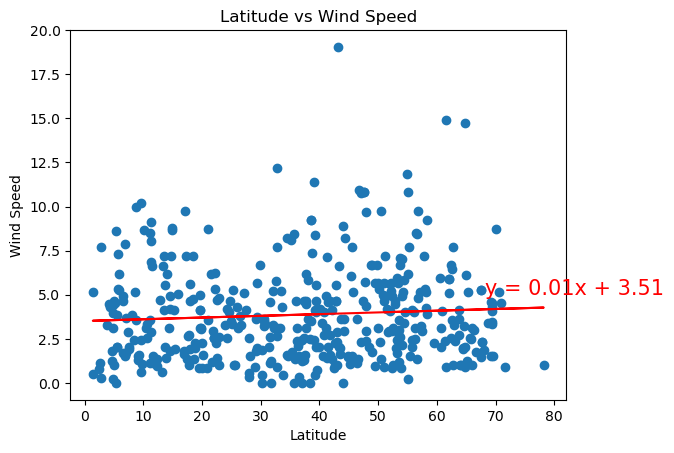

The r^2 value is: 0.06952864589965009


In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude vs Wind Speed", "Latitude", "Wind Speed")

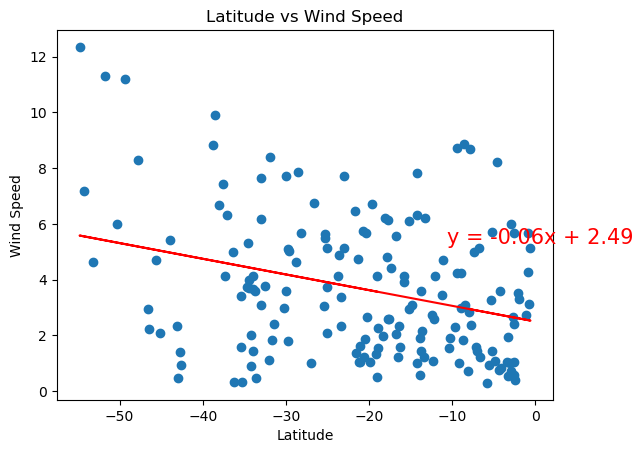

The r^2 value is: -0.3085647002929721


In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude vs Wind Speed", "Latitude", "Wind Speed")

**Discussion about the linear relationship:** 
Wind speed changes with distance from the equator. In both the Northern and Southern Hemispheres, wind speed seems to increase a little as you move further away from the equator. However, this is a very slight trend, suggesting that other factors, like local geography and weather patterns, likely play a bigger role in determining wind speed.